# Orders

Gran parte de nuestra tarea es crear "Features", variables en los datos que representan un aspecto del fenómeno que estudiamos y nos ayudan a explicarlo.

**Ejercicio**

Vamos a investigar la relación entre orders y el score.

La idea es crear un dataframe con las siguientes features:

| feature_name 	                | type 	| description 	                                                                                                                                         |
|:------------------------------|:---:	|:------------------------------------------------------------------------------------------------------------------------------------------------------|
| `order_id` 	                  | str 	| the id of the order 	                                                                                                                                 |
| `tiempo_de_espera` 	          | float 	| numero de días entre order_date y delivered_date 	                                                                                                    |
| `tiempo_de_espera_previsto` 	 | float 	| numero de días entre order_date y estimated_delivery_date 	                                                                                           |
| `real_vas_esperado` 	         | float 	| si la fecha de entrega real es posterior a la fecha de entrega estimada, devuelve el número de días entre las dos fechas; de lo contrario, devuelve 0 |
| `order_status` 	              | str 	| statusde la orden	                                                                                                                                    |
| `es_cinco_estrellas` 	        | int 	| 1 si tuvo cinco estrellas en la  review, 0 caso contrario 	                                                                                           |
| `es_una_estrella` 	           | int 	| 1 si tuvo una estrella, 0 caso contrario 	                                                                                                            |
| `review_score` 	              | int 	| from 1 to 5 	                                                                                                                                         |
| `numero_de_productos` 	       | int 	| numero de productos que contiene una orden	                                                                                                           |
| `numero_de_vendedores` 	      | int 	| numero de vendedores unicos                                                                                                                           |
| `precio` 	                    | float 	| total del precio pagado por el cliente                                                                                                                |
| `valor_transporte` 	          | float 	| el valor del freight pagado por el cliente 	                                                                                                          |
| `distancia_al_cliente` 	      | float 	| distancia en km entre cliente y vendedor 	                                                                                                  |
  
Queremos filtrar las ordenes no entregadas

## Metodología:

Vamos a crear dos notebooks una de testeo y otra para importar nuestro paquete preprocess.orders_data y de ahí ir elavorando los métodos.

1er Método: Load_data: Trae el dataset sin nulos de una ubicación ya prefijada.

###  Buenas Pracitcas


Las notebooks se pueden hacer muy largas y desordenadas.
- Codifique su lógica para que siempre se pueda ejecutar de arriba a abajo sin fallar (Celda --> Ejecutar todo)
- Nombre sus variables con lo que significa y para que otra persona pueda entenderlo.
- Use nombres como `tmp` o `_` para pasos intermedios si sabe que no va a usarlos mucho tiempo
- Borre su código y combine celdas cuando sea relevante para minimizar el tamaño del Notebook (`Shift-M`)
- Oculte la salida de su celda si ya no necesita verla (haga doble clic en la sección roja `Out[]:` a la izquierda de su celda).
- Utilice la Structure de pycharm o Juypter lab para organizarse
- Shortcuts
    - `a` para insertar una celda arriba
    - `b` para insertar una celda debajo
    - `dd` para borrar una celda
    - `esc` y `flechas` para moverse entre celdas
    - `Shift-Enter` para ejecutar la celda y mover el foco a la siguiente
    - `Shift + Tab` cuando entre paréntesis de método, p. ¡`groupby()` para obtener los documentos! Repita varias veces para abrirlo permanentemente

In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [9]:
from funciones.loaddata import load_all_data
data = load_all_data("data")

In [3]:
data.keys()

dict_keys(['geolocation', 'orders', 'order_items', 'order_payments', 'order_reviews', 'products', 'sellers', 'product_category_name_translation'])

In [10]:
orders = data['orders'].copy() # buena practica para estar seguro que no modificas tu dataset original

## 1. Crear orders.py

### a) `tiempo_de_espera`
    Armar un dataframe que tenga
           order_id, tiempo_de_espera, tiempo_de_espera_previsto, real_vs_esperado, status_de_la_orden


# Pasos a seguir

> 1. Explora el dataframe `orders`
2. Filtra por `delivered orders`
3. Manipulá correctamente `datetime` (recordá el examen)
    - Repasá[`datetime`](https://docs.python.org/3/library/datetime.html)
    - Métodos para pasar "string" type a "pandas.datetime'  [`pandas.to_datetime()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)
4. Crea la columna `tiempo_de_espera`
5. Crea la columna  `tiempo_de_espera_previsto`
6. Crea la columna  `real_vs_esperado`
7. Chequea el nuevo dataset
8. Una vez terminado el código pasalo a tu librería `order.py`

Tanto para `tiempo_de_espera` como para `tiempo_de_espera_previsto`, debe restar las fechas/marcas de tiempo relevantes para obtener la diferencia horaria entre los objetos `pandas.datetime`. Luego, puede usar [`datetime.timedelta()`](https://docs.python.org/3/library/datetime.html#timedelta-objects) o [`np.timedelta64()`](https ://numpy.org/doc/stable/reference/arrays.datetime.html#datetime-and-timedelta-arithmetic) para averiguar cuántos días representa esa resta.


In [6]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [7]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [6]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [14]:
orders.shape

(99441, 8)

In [11]:
orders["order_status"].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [12]:
orders = orders[orders["order_status"]=="delivered"]

In [13]:
# Transforma a datetime
from funciones.preprocess import transformar_columnas_datetime

In [14]:
columnas_a_convertir = ['order_purchase_timestamp', 'order_approved_at',"order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date" ]

transformar_columnas_datetime(orders, columnas_a_convertir)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


### Crear una columna
Es lo mismo utilizar .loc para asignar una columna nueva, que utilizar .assign o simplemente df['columna'] = operación

##  Compute just the number of days in each time_delta 
import datetime
one_day_delta = datetime.timedelta(days=1) # lleva el time delta a un día
one_day_delta = np.timedelta64(24, 'h') # también se puede hacer de esta manera


* \ se puede usar para ahorrar espacio
orders.loc[:,'tiempo_de_espera'] = \
    (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']) / one_day_delta

(orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.da


# pasarlo a modulo

Crear la funcion tiempo_de_espera e implementarla

to write python code


def tiempo_de_espera(orders, is_delivered=True):
    # filtrar por entregados y crea la varialbe tiempo de espera
    if is_delivered:
        orders = orders.query("order_status=='delivered'").copy()
    # compute wait time
    orders.loc[:, 'tiempo_de_espera'] = \
        (orders['order_delivered_customer_date'] -
         orders['order_purchase_timestamp']) / np.timedelta64(24, 'h')
    return orders

def

In [ ]:

def tiempo_de_espera(orders, is_delivered=True):
    # filtrar por entregados y crea la varialbe tiempo de espera
    if is_delivered:
        orders = orders.query("order_status=='delivered'").copy()
    # compute wait time
    orders.loc[:, 'tiempo_de_espera'] = \
        (orders['order_delivered_customer_date'] -
         orders['order_purchase_timestamp']) / np.timedelta64(24, 'h')
    return orders


In [15]:
from funciones.preprocess import tiempo_de_espera
orders = tiempo_de_espera(orders,is_delivered=False)
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tiempo_de_espera
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877


In [16]:
from funciones.preprocess import tiempo_de_espera_esperado
orders = tiempo_de_espera_esperado(orders,is_delivered=False)
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tiempo_de_espera,tiempo_de_espera_esperado
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,15.544063
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,19.137766
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,26.639711
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,26.188819
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,12.112049


In [20]:
orders["order_status"].unique()

array(['delivered'], dtype=object)

In [17]:
#crear real vs esperado
# ver que columnas hay
# igual que en NPS si algun numero en real_vs_esperado es negativo reemplazarlo por 0
from funciones.preprocess import real_vs_esperado
orders = real_vs_esperado(orders,"tiempo_de_espera","tiempo_de_espera_esperado")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tiempo_de_espera,tiempo_de_espera_esperado,Real_vs_Esperado
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,15.544063,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,19.137766,0.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,26.639711,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,26.188819,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,12.112049,0.0


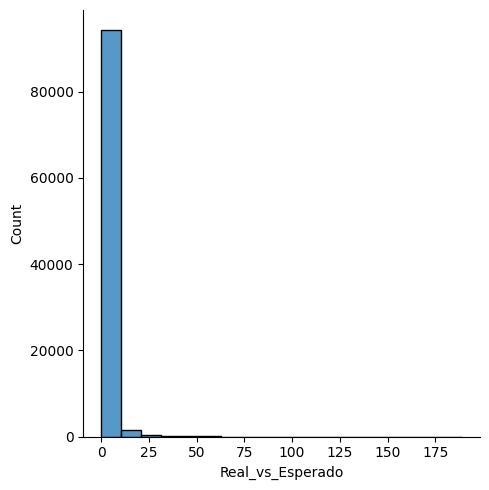

In [18]:
sns.displot(orders['Real_vs_Esperado'])

### b) `puntaje_de_compra`
     retorna un dataframe con
        order_id, es_cinco_estrellas, es_una_estrella, review_score

recordar del examen `DataFrame.apply()` o tmb se puede usar`Series.map()`

👉 We load the `reviews` for you

In [19]:
reviews = data['order_reviews'].copy()

reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [20]:
from funciones.preprocess import puntaje_d_compra
reviews = puntaje_d_compra(reviews)
reviews.head()

,order_id,5estrellas,1estrella,review_score
0,73fc7af87114b39712e6da79b0a377eb,0,0,4
1,a548910a1c6147796b98fdf73dbeba33,1,0,5
2,f9e4b658b201a9f2ecdecbb34bed034b,1,0,5
3,658677c97b385a9be170737859d3511b,1,0,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,1,0,5


### c) `numero_de_productos`:
     retorna un dataframe con
        order_id, numero_de_productos (numero_de_productos_por_orden)

In [21]:
from funciones.preprocess import calcular_numero_productos
#fijarse que no uso solo un dataframe
productos = calcular_numero_productos(data) 
productos

,order_id,num_de_produc
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1
98662,fffcd46ef2263f404302a634eb57f7eb,1
98663,fffce4705a9662cd70adb13d4a31832d,1
98664,fffe18544ffabc95dfada21779c9644f,1


### d) `numero_de_vendedores`:
     Retorna un dataframe con
        order_id, numero_de_vendedores (total de vendedores UNICOS !!! )

HINT!:
`pd.Series.nunique()`


In [22]:
from funciones.preprocess import vendedores_unicos
vendedores = vendedores_unicos(data)
vendedores

,vendedores_unicos
order_id,
00010242fe8c5a6d1ba2dd792cb16214,1
00018f77f2f0320c557190d7a144bdd3,1
000229ec398224ef6ca0657da4fc703e,1
00024acbcdf0a6daa1e931b038114c75,1
00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...
fffc94f6ce00a00581880bf54a75a037,1
fffcd46ef2263f404302a634eb57f7eb,1
fffce4705a9662cd70adb13d4a31832d,1


In [23]:
from funciones.preprocess import vendedores_unicos
vendedores = vendedores_unicos(data)
vendedores

,vendedores_unicos
order_id,
00010242fe8c5a6d1ba2dd792cb16214,1
00018f77f2f0320c557190d7a144bdd3,1
000229ec398224ef6ca0657da4fc703e,1
00024acbcdf0a6daa1e931b038114c75,1
00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...
fffc94f6ce00a00581880bf54a75a037,1
fffcd46ef2263f404302a634eb57f7eb,1
fffce4705a9662cd70adb13d4a31832d,1


### e) `calcular_precio_y_transporte`
     Returns a DataFrame with:
        order_id, precio, valor_transporte

recordar el agg en el groupby

In [24]:
from funciones.preprocess import calcular_precio_y_transporte
precio_y_transporte = calcular_precio_y_transporte(data)
precio_y_transporte

,precio,transporte
order_id,,
00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,239.90,19.93
000229ec398224ef6ca0657da4fc703e,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14
...,...,...
fffc94f6ce00a00581880bf54a75a037,299.99,43.41
fffcd46ef2263f404302a634eb57f7eb,350.00,36.53
fffce4705a9662cd70adb13d4a31832d,99.90,16.95


### e) `distancia_al_cliente`

    Retorna un dataframe con
        order_id, distancia_al_cliente (distancia en kilometros)

usar`haversine_distance`

In [20]:
from math import radians, sin, cos, asin, sqrt

def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Computa distancia entre dos pares (lat, lng)
    Ver - (https://en.wikipedia.org/wiki/Haversine_formula)
    """
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    return 2 * 6371 * asin(sqrt(a))


In [21]:
#Tip 1:
# usar los datasets

# data['order_items']
# data['sellers']
# data['customers']


In [22]:
#tipo 2
#usar el dataset de geolocalizacion
# Un zip code puede tener varias lat y lon. groupby puede ser usado con el metodo .first() para quedarte con el primero
#agroupa data['geolocation'] con ese metodo y crea un datset llamado geo

# Solo usar columnas 'seller_id', 'seller_zip_code_prefix', 'geolocation_lat', 'geolocation_lng'



In [23]:

# mergear sellers con geolocalizacion
# Mergear con buyers, usar solo de ese dataset ['customer_id', 'customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']

# Mergear en otra tabla compradores y vendedores


# Mergear ese resultado con geolocalizacion de compradores

# Remover  na()

# Una orden puede tener muchos compradores retorna el promedio


In [24]:
from olist.preprocess import calcular_distancia_vendedor_comprador
distancia_a_la_orden = calcular_distancia_vendedor_comprador(data)

In [25]:
distancia_a_la_orden

,order_id,distance_seller_customer
0,00010242fe8c5a6d1ba2dd792cb16214,301.005664
1,00018f77f2f0320c557190d7a144bdd3,589.274140
2,000229ec398224ef6ca0657da4fc703e,312.495046
3,00024acbcdf0a6daa1e931b038114c75,301.951753
4,00042b26cf59d7ce69dfabb4e55b4fd9,646.221788
...,...,...
98172,fffc94f6ce00a00581880bf54a75a037,2755.314485
98173,fffcd46ef2263f404302a634eb57f7eb,354.848852
98174,fffce4705a9662cd70adb13d4a31832d,338.827218
98175,fffe18544ffabc95dfada21779c9644f,72.870476


In [26]:
distancia_a_la_orden

,order_id,distance_seller_customer
0,00010242fe8c5a6d1ba2dd792cb16214,301.005664
1,00018f77f2f0320c557190d7a144bdd3,589.274140
2,000229ec398224ef6ca0657da4fc703e,312.495046
3,00024acbcdf0a6daa1e931b038114c75,301.951753
4,00042b26cf59d7ce69dfabb4e55b4fd9,646.221788
...,...,...
98172,fffc94f6ce00a00581880bf54a75a037,2755.314485
98173,fffcd46ef2263f404302a634eb57f7eb,354.848852
98174,fffce4705a9662cd70adb13d4a31832d,338.827218
98175,fffe18544ffabc95dfada21779c9644f,72.870476


cual es la mediana de la distancia

In [27]:
distancia_a_la_orden['distance_seller_customer'].describe()

count    98177.000000
mean       601.961534
std        596.877838
min          0.000000
25%        186.380313
50%        433.698770
75%        798.435455
max       8736.947618
Name: distance_seller_customer, dtype: float64

# Merger todos los datasets excepto el de distancia

In [25]:
tablon_primario = orders.merge(reviews, on='order_id') \
    .merge(productos, on='order_id') \
    .merge(vendedores, on='order_id') \
    .merge(precio_y_transporte, on='order_id')
tablon_primario

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tiempo_de_espera,tiempo_de_espera_esperado,Real_vs_Esperado,5estrellas,1estrella,review_score,num_de_produc,vendedores_unicos,precio,transporte
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,15.544063,0.0,0,0,4,1,1,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,19.137766,0.0,0,0,4,1,1,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,26.639711,0.0,1,0,5,1,1,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,26.188819,0.0,1,0,5,1,1,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,12.112049,0.0,1,0,5,1,1,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96356,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.218009,18.587442,0.0,1,0,5,1,1,72.00,13.08
96357,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.193727,23.459051,0.0,0,0,4,1,1,174.90,20.10
96358,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.859421,30.384225,0.0,1,0,5,1,1,205.99,65.02
96359,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,37.105243,0.0,0,0,2,2,1,359.98,81.18


In [26]:
tablon_primario.to_csv("data/tablon_primario.cv")